# Robust analysis task

Create the stan script that allows you to model simultaneously the effects in both groups. You need two intercepts and two slopes, and off course standard deviation (sigma) - you may try to fit a model with two different standard deviations but I don't think this will matter a lot.

We want our model to be robust so we will use the Student t distribution with 4 degrees of freedom

In [1]:
library("rstan")
library(rstanarm)

options(mc.cores = parallel::detectCores())
rstan_options(auto_write = TRUE)

Loading required package: StanHeaders

Loading required package: ggplot2

rstan (Version 2.21.2, GitRev: 2e1f913d3ca3)

For execution on a local, multicore CPU with excess RAM we recommend calling
options(mc.cores = parallel::detectCores()).
To avoid recompilation of unchanged Stan programs, we recommend calling
rstan_options(auto_write = TRUE)

Loading required package: Rcpp

This is rstanarm version 2.21.1

- See https://mc-stan.org/rstanarm/articles/priors for changes to default priors!

- Default priors may change, so it's safest to specify priors, even if equivalent to the defaults.

- For execution on a local, multicore CPU with excess RAM we recommend calling

  options(mc.cores = parallel::detectCores())


Attaching package: ‘rstanarm’


The following object is masked from ‘package:rstan’:

    loo




In [2]:
# read data

d1 = read.csv('effect.csv', header = F)
d2 = read.csv('no_effect.csv', header = F)

In [3]:
length(d2$V1)

[1] 16

In [4]:
model_data <- list(x1=d1$V1, y1=d1$V2, n1=length(d1$V1), x2=d2$V1, y2=d2$V2, n2=length(d2$V1), nu=4)

fear_model_simple <- stan(file = 'r_model.stan', data = model_data)

In [5]:
fear_model_simple

Inference for Stan model: r_model.
4 chains, each with iter=2000; warmup=1000; thin=1; 
post-warmup draws per chain=1000, total post-warmup draws=4000.

          mean se_mean   sd   2.5%    25%    50%    75%  97.5% n_eff Rhat
beta0_0   0.27    0.02 1.32  -2.33  -0.62   0.28   1.15   2.81  3596    1
beta0_1   0.12    0.00 0.06  -0.01   0.08   0.12   0.16   0.25  3958    1
beta1_0   3.49    0.04 2.21  -1.25   2.15   3.63   5.00   7.49  2784    1
beta1_1  -0.07    0.00 0.05  -0.17  -0.11  -0.08  -0.04   0.05  2845    1
sigma1    4.31    0.02 0.99   2.76   3.61   4.17   4.85   6.74  3767    1
sigma2    6.11    0.03 1.76   3.54   4.85   5.83   7.06  10.27  2910    1
lp__    -73.32    0.05 1.89 -77.93 -74.36 -72.97 -71.92 -70.68  1698    1

Samples were drawn using NUTS(diag_e) at Wed Jan 19 13:40:50 2022.
For each parameter, n_eff is a crude measure of effective sample size,
and Rhat is the potential scale reduction factor on split chains (at 
convergence, Rhat=1).

----
### Universal version

In [24]:
d1$f <- 0
d2$f <- 1

In [25]:
d = rbind(d1,d2)

In [27]:
M = model.matrix(~ V1 * f, d)

In [35]:
model_data <- list(n=length(d$V1), k=ncol(M), m=M, y=d$V2, nu=4)

fear_model <- stan(file = 'fear_model_matrix.stan', data = model_data)

In [69]:
head(M)

,(Intercept),V1,f,V1:f
1,1,-55.02032,0,0
2,1,-30.02167,0,0
3,1,-25.22060,0,0
4,1,-25.05505,0,0
5,1,-20.08843,0,0
6,1,-19.92288,0,0


In [36]:
fear_model

Inference for Stan model: fear_model_matrix.
4 chains, each with iter=2000; warmup=1000; thin=1; 
post-warmup draws per chain=1000, total post-warmup draws=4000.

          mean se_mean   sd   2.5%    25%    50%    75%  97.5% n_eff Rhat
beta[1]   0.20    0.03 1.38  -2.53  -0.73   0.24   1.14   2.81  2293    1
beta[2]   0.12    0.00 0.07  -0.01   0.08   0.12   0.16   0.25  1893    1
beta[3]   3.78    0.05 2.24  -0.71   2.29   3.83   5.36   7.94  2216    1
beta[4]  -0.20    0.00 0.08  -0.35  -0.26  -0.20  -0.15  -0.05  1947    1
sigma     4.68    0.02 0.80   3.34   4.14   4.60   5.14   6.46  2407    1
lp__    -74.50    0.04 1.70 -78.70 -75.39 -74.17 -73.25 -72.24  1576    1

Samples were drawn using NUTS(diag_e) at Wed Jan 12 14:48:02 2022.
For each parameter, n_eff is a crude measure of effective sample size,
and Rhat is the potential scale reduction factor on split chains (at 
convergence, Rhat=1).

---

## Visualization

In [58]:
fear_model_simple

Inference for Stan model: r_model.
4 chains, each with iter=2000; warmup=1000; thin=1; 
post-warmup draws per chain=1000, total post-warmup draws=4000.

          mean se_mean   sd   2.5%    25%    50%    75%  97.5% n_eff Rhat
beta0_0   0.24    0.02 1.37  -2.49  -0.67   0.24   1.16   2.93  3968    1
beta0_1   0.12    0.00 0.06  -0.01   0.08   0.12   0.16   0.23  3743    1
beta1_0   3.55    0.04 2.19  -1.03   2.18   3.64   5.02   7.55  2631    1
beta1_1  -0.07    0.00 0.05  -0.17  -0.11  -0.08  -0.04   0.04  2802    1
sigma1    4.33    0.02 1.02   2.76   3.61   4.19   4.91   6.79  4018    1
sigma2    6.06    0.03 1.75   3.55   4.80   5.78   6.99  10.14  2829    1
lp__    -73.40    0.05 1.92 -78.01 -74.43 -73.06 -71.99 -70.72  1481    1

Samples were drawn using NUTS(diag_e) at Wed Jan 12 14:50:32 2022.
For each parameter, n_eff is a crude measure of effective sample size,
and Rhat is the potential scale reduction factor on split chains (at 
convergence, Rhat=1).

In [40]:
fear_model_simple_df = as.data.frame(fear_model_simple)

In [53]:
parameters_list = apply(fear_model_simple_df, 2, mean)
beta0_0 = parameters_list[1]
beta0_1 = parameters_list[2]
beta1_0 = parameters_list[3]
beta1_1 = parameters_list[4]

In [54]:
e_dist_1 = beta0_0 + beta0_1 * d1$V1

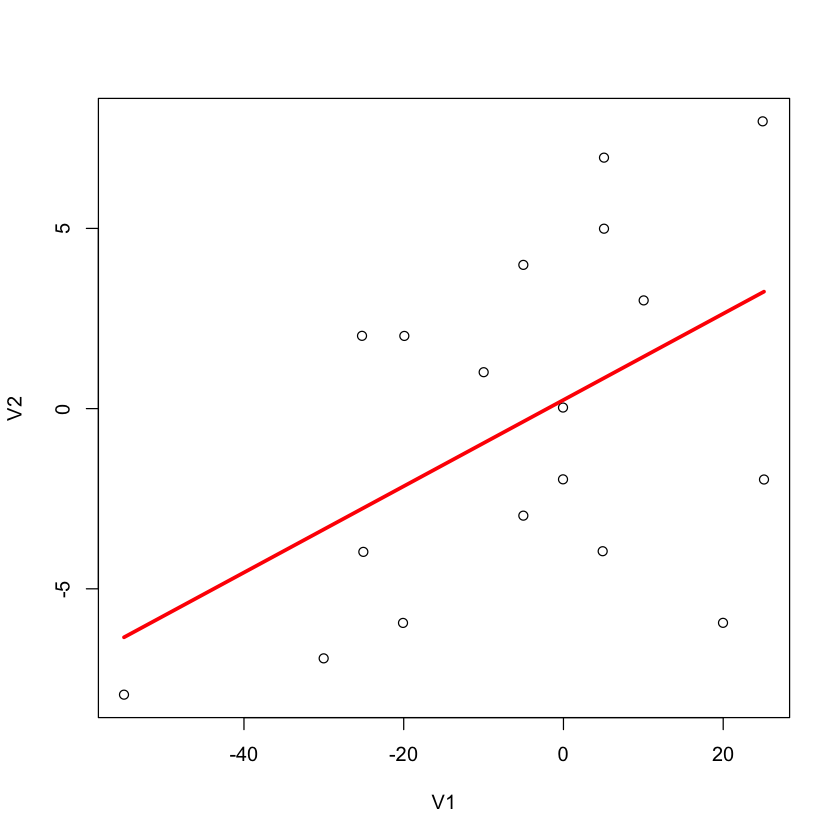

In [56]:
par(bg = 'white')

plot(V2 ~ V1, d1)
lines(d1$V1, e_dist_1, col = 'red', lw=3)

In [48]:
e_dist_2 = beta1_0 + beta1_1 * d2$V1 

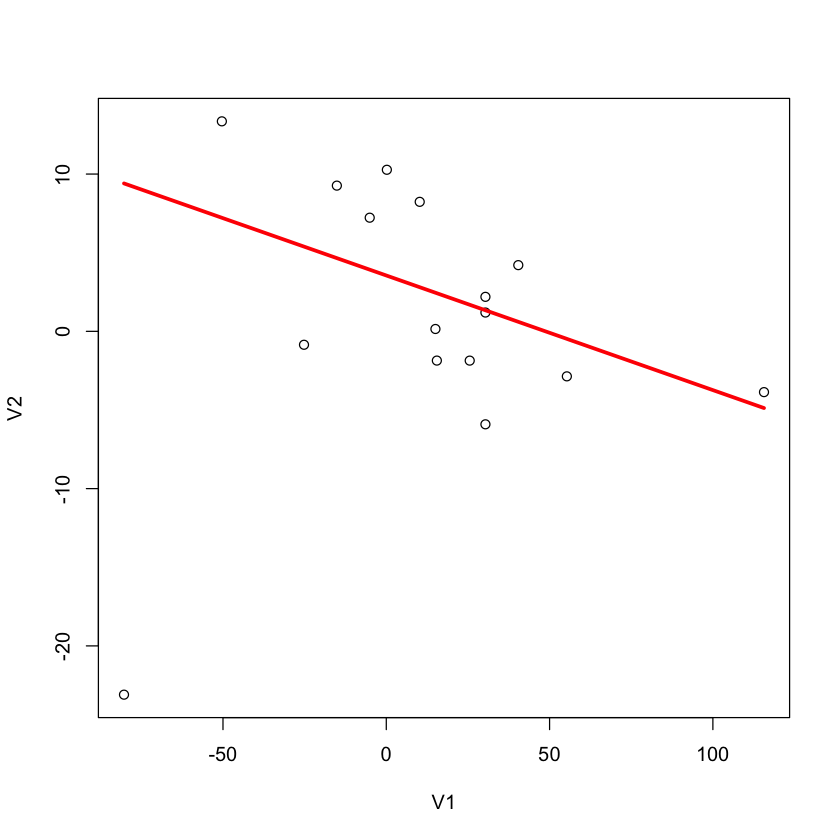

In [57]:
par(bg = 'white')

plot(V2 ~ V1, d2)
lines(d2$V1, e_dist_2, col = 'red', lw=3)